# Повторение основ :)

# Линейная регрессия

Обозначения:
- $\mathbb{X} \in \mathbb{R}^{n \times m}$ - матрица признаков
- $\mathbb{Y} \in \mathbb{R}^n$ - целевая переменная
- $x \in \mathbb{R}^{m}$ - один объект из выборки
- $\omega = (\omega_1,...,\omega_m)$ - вектор весов (параметров) модели
- $Q(f, \mathbb{Y})$ - функционал ошибок

Общий вид модели: $f(x, \omega) = \omega_0 + x_1\omega_1 + ... + x_m\omega_m = \sum\limits_{i=0}^{m}x_i\omega_i = <x, \omega>$

**Пример**
![lin_reg](./example_lin_reg.png)
<p style="text-align: center;"></p>

**Как делали до этого?**

import sklearn

model = sklearn.LinReg(params) \
model.fit(X_train, y_train) \
model.predict(X_test) 

___Готово!___

Давайте разберёмся, как это работает под капотом

# Немного теории оптимизаций

Пусть $f$ - векторная функция.

$\nabla f = \big(\dfrac{\partial f}{\partial x_1},...,\dfrac{\partial f}{\partial x_n} \big)$.\
Градиент показывает направление __наискорейшего роста__ функции.\
В задачах машинного обучения мы хотим минимизировать некоторый функционал ошибок. Поможет ли в этом градиент?

___Ваш ответ:___ $-\nabla f$

![rm](./rik_and_morti.jpeg)
<p style="text-align: center;"></p>

# Классический градиентный спуск

$-\nabla_{\omega}Q$ - вектор, направленный в сторону наискорешего убывания.

Тогда можем задать рекуррентную формулу:

$\omega^{(k)} = \omega^{(k - 1)} - \eta \nabla_{\omega}Q(\omega^{(k-1)})$

Где $\eta$ - шаг нашего спуска.

В двухмерном виде выглядит так:

![grad](./grad.png)
<p style="text-align: center;"></p>

Открытые вопросы: 
- Как задавать $\omega^{(0)}$?
- Когда останавливаться?

___Ваша заметка:___

$\omega^{(0)}$ - рандомим

Останавливаемся: задаем количество шагов спуска

# Stochastic Gradient Descent 

$Q(f, \mathbb{Y}) = \dfrac{1}{n}\sum\limits_{i=1}^{n}q_i(x_i, \omega, y_i)$

$\nabla_{\omega}Q = \dfrac{1}{n}\sum\limits_{i=1}^{n}\nabla_{\omega}q_i$

Вычисляем градиенты n раз!

$\nabla_{\omega}Q \approx \nabla_{\omega}q_i$

Тогда:

$\omega^{(k)} = \omega^{(k-1)} - \eta_k \nabla_{\omega}q_{i_k}(\omega^{(k-1)})$, где $i_k$ - номер случайного элемента из выборки на $k$-ом шаге

___Теорема___:
Сходимость SGD гарантируется, если выполнены условия:
- $\sum\limits_{k=1}^{\infty}\eta_k$ - расходится
- $\sum\limits_{k=1}^{\infty}\eta_k^2$ - сходится

Например, можно брать последовательность $\eta_k = \dfrac{1}{k}$

# Пишем свою модель

Будем собирать нашу модель по кусочкам. Напишем и потестируем градиентный спуск.

Функионал ошибок: $Q = MSE = \sum\limits_{i}(y_i-x_i^T \omega)^2 = ||\mathbb{Y} - \mathbb{X}\omega||_2^2$

<p style="text-align: center;">$\omega_{opt} = (\mathbb{X}^T\mathbb{X})^{-1}\mathbb{X}\mathbb{Y}$</p>

Найдём шаг градиентного спуска

$||\mathbb{Y} - \mathbb{X}\omega||_2^2 = <\mathbb{Y} - \mathbb{X}\omega, \mathbb{Y} - \mathbb{X}\omega>$

Дифференциал для векторной функции: $df(x)\big|_{x_0} = <\nabla f(x), x_0>$

Формула дифференциала скалярного произведения: $d(<u, v>)\big|_{\omega} = <d(u)|_{\omega}, v> + <u, d(v)|_{\omega}>$

$dQ\big|_{\omega_{*}} = 2<d(\mathbb{Y} - \mathbb{X}\omega)\big|_{\omega_{*}}, \mathbb{Y} - \mathbb{X}\omega>$

$dQ\big|_{\omega_{*}} = -2<\mathbb{Y} - \mathbb{X}\omega, \mathbb{X}\omega_{*}> = -2\mathbb{X}^T<\mathbb{Y} - \mathbb{X}\omega, \omega_{*}>$

$\nabla_{\omega}Q = -2\mathbb{X}^T(\mathbb{Y} - \mathbb{X}\omega) = 2\mathbb{X}^T(\mathbb{X}\omega - \mathbb{Y})$

In [1]:
import random

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
random_seed = 43
n_features = 2
n_objects = 300
batch_size = 10
num_steps = 50
np.random.seed(random_seed)

# Генерим истинные веса
w_true = np.random.normal(size=(n_features, ))

# Под веса создаем признаки
X = np.random.uniform(-5, 5, (n_objects, n_features))

X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :] 

# Создаем таргет
Y = X.dot(w_true) + np.random.normal(0, 1, n_objects)

In [3]:
# Пишем градиентный спуск

w_0 = np.random.uniform(-2, 2, n_features)-0.5
w = w_0.copy()
w_list = [w.copy()]
learning_rate = 1e-2

for i in range(num_steps):
    w -= 2 * learning_rate * np.dot(X.T, np.dot(X, w) - Y) / Y.size
    w_list.append(w.copy())
    
w_list = np.array(w_list)

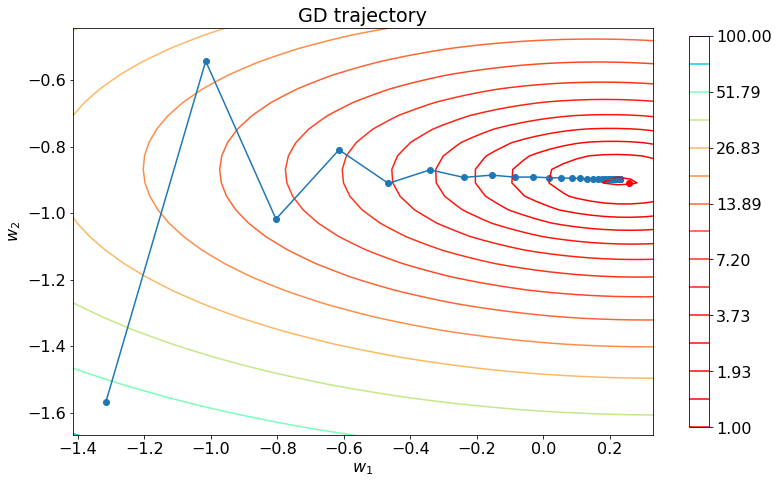

In [4]:
matplotlib.rcParams.update({'font.size': 16})

# Визуализируем градиентный спуск
A, B = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))

levels = np.empty_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        w_tmp = np.array([A[i, j], B[i, j]])
        levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - Y, 2))

plt.figure(figsize=(13, 9))
plt.title('GD trajectory')
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
plt.gca().set_aspect('equal')

CS = plt.contour(A, B, levels, levels=np.logspace(0, 2, num=15), cmap=plt.cm.rainbow_r)
CB = plt.colorbar(CS, shrink=0.8, extend='both')

plt.scatter(w_true[0], w_true[1], c='r')
plt.scatter(w_list[:, 0], w_list[:, 1])
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

# Напишем SGD

In [9]:
np.random.seed(random_seed)
w = w_0.copy()
w_list = [w.copy()]
lr_0 = 0.01
batch_size = 10

for i in range(num_steps):
    lr = lr_0 / (i+1)
    sample_indices = np.random.randint(n_objects, size=batch_size)
    w -= 2 * lr * np.dot(X[sample_indices].T, np.dot(X[sample_indices], w) - Y[sample_indices]) / batch_size
    w_list.append(w.copy())
w_list = np.array(w_list)

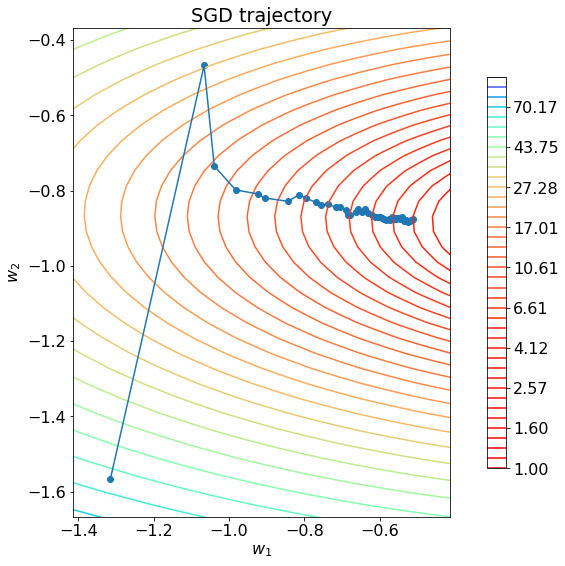

In [10]:
A, B = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))

levels = np.empty_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        w_tmp = np.array([A[i, j], B[i, j]])
        levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - Y, 2))

plt.figure(figsize=(13, 9))
plt.title('SGD trajectory')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')
plt.xlim((w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1))
plt.ylim((w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1))
plt.gca().set_aspect('equal')

# visualize the level set
CS = plt.contour(A, B, levels, levels=np.logspace(0, 2, num=40), cmap=plt.cm.rainbow_r)
CB = plt.colorbar(CS, shrink=0.8, extend='both')

# visualize trajectory
plt.scatter(w_true[0], w_true[1], c='r')
plt.scatter(w_list[:, 0], w_list[:, 1])
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

# Реализуем полностью нашу собственную модель линейной регрессии

In [2]:
from sklearn.base import BaseEstimator, RegressorMixin

class LinReg(BaseEstimator, RegressorMixin):
    
    def __init__(self, batch_size=25, num_steps=350, lr=1e-2):
        self.batch_size = batch_size
        self.num_steps = num_steps
        self.lr = lr

    def fit(self, X, Y):
        w = np.random.randn(X.shape[1])[:, None]
        n_objects = len(X)

        for i in range(self.num_steps):
            sample_indices = np.random.randint(0, n_objects, size=batch_size)
            w -= 2 * self.lr * np.dot(X[sample_indices].T, np.dot(X[sample_indices], w) - Y[sample_indices]) / self.batch_size

        self.w = w
        return self

    def predict(self, X):
        return X @ self.w

___Задание___: 
- Реализовать свою модель линейной регрессии с регуляризацией и сравнить с моделью Ridge

In [23]:
class RidgeReg(BaseEstimator, RegressorMixin):
    def __init__(self, batch_size=25, num_steps=350, lr=1e-2, l2=1):
        self.batch_size = batch_size
        self.num_steps = num_steps
        self.lr = lr
        self.l2 = l2

    def fit(self, X, Y):
        w = np.random.rand(X.shape[1])[:, None]
        n_objects = len(X)

        for i in range(self.num_steps):
            samples = np.random.randint(0, n_objects, size=self.batch_size)
            w -= (2 * self.lr * np.dot( X[samples].T, np.dot( X[samples], w ) - Y[samples]) / self.batch_size) + (2 * self.l2 * w / self.batch_size)

        self.w = w
        return self

    def predict(self, X):
        return X @ self.w

# Сравним с моделью из коробки

In [25]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

#Генерация данных для тестирования
n_features = 700
n_objects = 100000

w_true = np.random.uniform(-2, 2, (n_features, 1))

X = np.random.uniform(-100, 100, (n_objects, n_features)) * np.arange(n_features)
X[-1] += 2
X[-2] -= 5
Y = X.dot(w_true) + np.random.normal(0, 10, (n_objects, 1))

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y)

In [27]:
scaler = StandardScaler()
scaler.fit(x_train)
x_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

Сравним модели по $R^2 score$.

<p style="text-align: center;">$R^2 = 1 - \dfrac{\sum\limits_{i}(y_i - f(x_i, \omega))^2}{\sum\limits_{i}(y_i - y_{mean})^2}$</p>

$R^2 score$ показывает насколько наша модель хорошо описывает данные

In [30]:
own_model = RidgeReg(l2=0.001).fit(x_scaled, y_train)
y_pred = own_model.predict(x_test_scaled)
own_r2 = r2_score(y_test, y_pred)

sklearn_model = Ridge().fit(x_scaled, y_train)
y_pred = sklearn_model.predict(x_test_scaled)
sklearn_r2 = r2_score(y_test, y_pred)

print('R^2 in own model:', own_r2)
print('R^2 in sklearn loss:', sklearn_r2)

R^2 in own model: 0.999882885822469
R^2 in sklearn loss: 0.9999999996124757


# Линейная классификация

Рассмотрим задачу бинарной классификации, пусть целевая переменная $y_i \in \{+1, -1\}$

В задачах линейной классификации мы исходим из предположения о линейной разделимости выборки:

![lin_class](./lin_sample.jpeg)
<p style="text-align: center;"></p>

Исходя из этого, наша модель имеет вид:

___Ваш ответ___: sign(<x, w>)

# Обучение линейного классификатора

Введём функционал ошибок: $Q = \dfrac{1}{n}\sum\limits_{i=1}^{n}[f(x_i, \omega) \neq y_i]$ - плохо

$Q = \dfrac{1}{n}\sum\limits_{i=1}^{n}[f(x_i, \omega) \neq y_i] < \dfrac{1}{n}\sum\limits_{i=1}^{n}L(x_i, \omega, y_i)$

# Логистическая регрессия

Хотим предсказывать не класс нашего объекта, а вероятность, что он принадлежит к классу +1, то есть $f(x_i) = \mathbb{P}(y_i = +1 | x_i)$

Зададим функцию правдоподобия:

$\mathcal{L} = \prod\limits_{i=1}^{n}f(x_i)^{[y_i=+1]}(1-f(x_i))^{[y_i = -1]}$

$-log\mathcal{L} = -\sum\limits_{i=1}^{n}\big(  [y_i=+1]logf(x) + [y_i=-1]log(1 - f(x)) \big)$

$L = [y_i=+1]logf(x) + [y_i=-1]log(1 - f(x))$

$\sigma(x) = \dfrac{1}{1 + e^{-x}}$

![sigmoid](./sigmoid.png)
<p style="text-align: center;"></p>

Если в качестве $f(x)$ взять $f(x) = \sigma(<x, \omega>)$, то $log-loss = \dfrac{1}{n}\sum\limits_{i=1}^{n}log(1 + e^{y_i<x_i, \omega>})$ 

___Задание___: написать свою логистическую регрессию

In [5]:
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression

data = load_digits()
X = data['data']
y = (data['target'] >= 5).astype(np.int32)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
X_train.shape, X_test.shape

((1257, 64), (540, 64))

In [7]:
m, n = X_train.shape
m, n

(1257, 64)

In [20]:
class LogReg(BaseEstimator, RegressorMixin):
    def __init__(self, batch_size=30, num_steps=400, lr=0.1):
        self.num_steps = num_steps
        self.batch_size = batch_size
        self.lr = lr

    @staticmethod
    def sigmoid(x):
        return 1.0 / (1.0 + np.exp(-x))

    def fit(self, X, Y):
        w = np.random.rand(n, 1) * 1e-3
        b = np.random.randn() * 1e-3

        for num in range(self.num_steps):
            samples = np.random.randint(0, X.shape[0], size=self.batch_size)

            z = np.dot(X[samples], w) + b
            a = self.sigmoid(z)

            dw = np.sum(X[samples] * (a - Y[samples].reshape(self.batch_size, 1)), axis=0) / self.batch_size
            db = np.sum((a - Y[samples].reshape(self.batch_size, 1)), axis=0) / self.batch_size

            w -= self.lr * dw.reshape(n, 1)
            b -= self.lr * db

        self.w = w
        self.b = b
        return self

    def predict(self, X):
        return np.array( [ self.sigmoid(np.dot(x, self.w) + self.b) for x in X] )

In [21]:
%%time
own_model = LogReg(num_steps=500).fit(X_train, y_train)
sklearn_model = LogisticRegression().fit(X_train, y_train)

test_prediction = own_model.predict(X_test)
test_prediction = test_prediction.reshape(540)
accuracy = np.sum((test_prediction > 0.5) == y_test) / len(test_prediction)
print(f'Точность собственной модели: {accuracy * 100:.2f}%')

test_prediction = sklearn_model.predict(X_test)
accuracy = np.sum((test_prediction > 0.5) == y_test) / len(test_prediction)
print(f'Точность sklearn модели: {accuracy * 100:.2f}%')

Точность собственной модели: 87.59%
Точность sklearn модели: 88.33%
Wall time: 55 ms
